In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import time
import sklearn
import scipy

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

In [3]:
from PlottingFunction import lda_1Dplot, plotModel, data_1Dplot
from Classification import model_fit, plot_confusion_matrix, model_fit2

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
from Classification import model_fit, plot_confusion_matrix, model_fit2, plot_prob, get_precision_recall
from PlottingFunction import lda_1Dplot, plotModel, data_1Dplot

In [6]:
glm = LogisticRegression(max_iter = 1e5)

rfc = RandomForestClassifier(criterion='gini', max_depth = 3, max_features = 8, min_samples_split = 10, 
                             random_state = 144,min_weight_fraction_leaf = 0.01)

svc = svm.SVC(C = 0.05, kernel = 'poly', max_iter = 1e5, degree = 1, probability = True, random_state = 144, gamma = 0.05)

gbc = GradientBoostingClassifier(random_state = 144, n_estimators = 5000, max_features = 5, max_depth = 5, min_samples_split = 25, 
              min_weight_fraction_leaf = 0.05, ccp_alpha = 1e-2)

knn = KNeighborsClassifier(n_neighbors=10)

GNB = GaussianNB(var_smoothing = 1e-8)


In [7]:
heart = pd.read_csv('FinalHeart.csv')
heart.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
X = heart.drop(['num'],axis=1).copy()
Y = heart.num.copy()

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.33, stratify=Y)

In [10]:
estimators = [('glm', make_pipeline(StandardScaler(),glm)),
              ('rfc', make_pipeline(StandardScaler(),rfc)),
              ('svc', make_pipeline(StandardScaler(),svc)),
              ('gbc', make_pipeline(StandardScaler(),gbc)),
              ('knn',make_pipeline(StandardScaler(),knn))
             ]

In [11]:
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), stack_method = 'predict_proba')
model_fit2(clf, X_train, X_test, Y_train, Y_test)

StackingClassifier

Train score is :0.697
Test score is :0.66


StackingClassifier
Precision score for training set is :0.83
Precision score for testing  set is :0.8
Recall score for training set is :0.93
Recall score for testing  set is :0.92
F1 score for training set is :0.88
F1 score for testing  set is :0.86
AUC for training set is :0.91
AUC for testing  set is :0.91
Precision score for training set is :0.0
Precision score for testing  set is :0.0
Recall score for training set is :0.0
Recall score for testing  set is :0.0
F1 score for training set is :0.0
F1 score for testing  set is :0.0
AUC for training set is :0.81
AUC for testing  set is :0.83


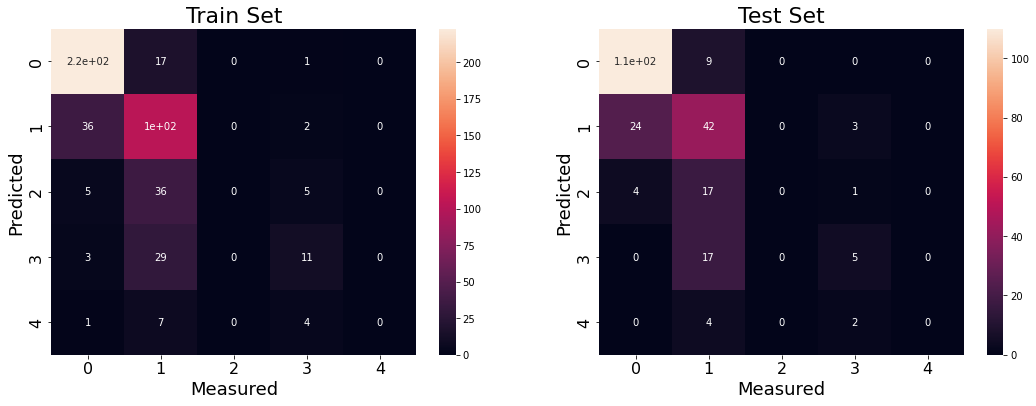

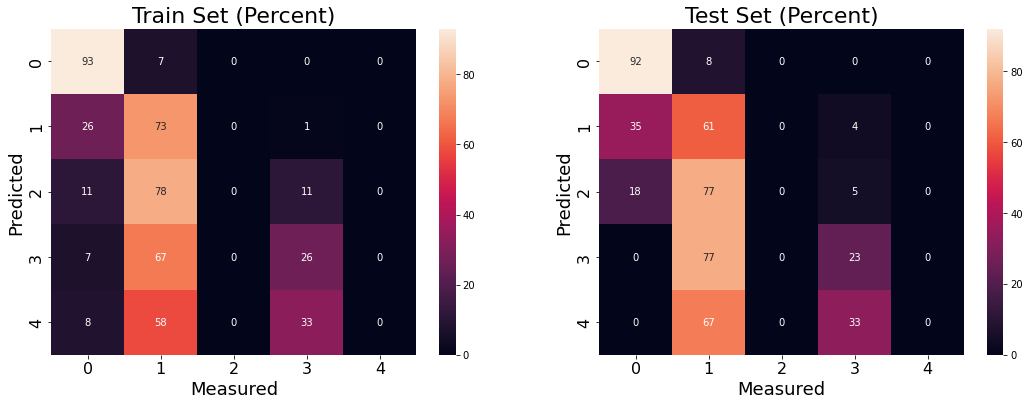

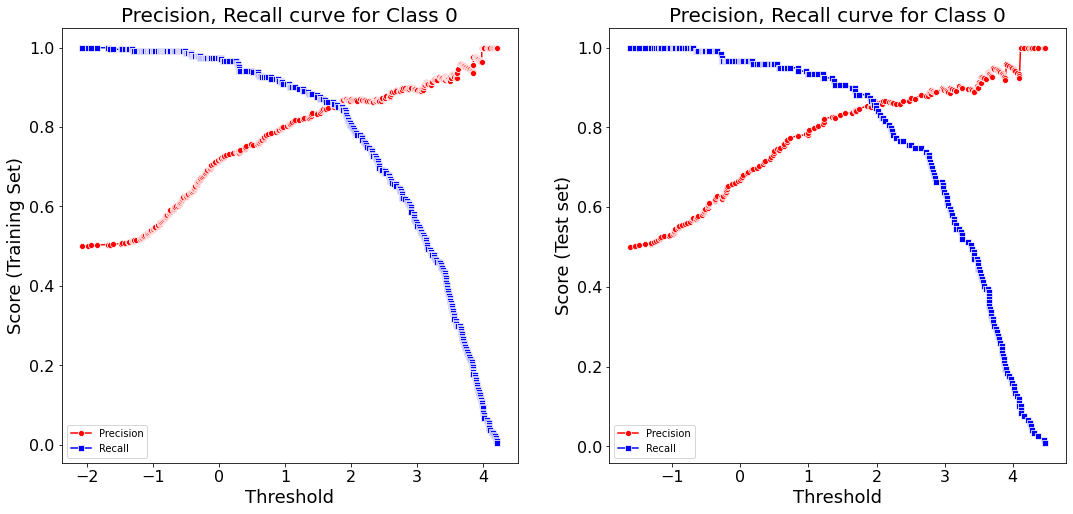

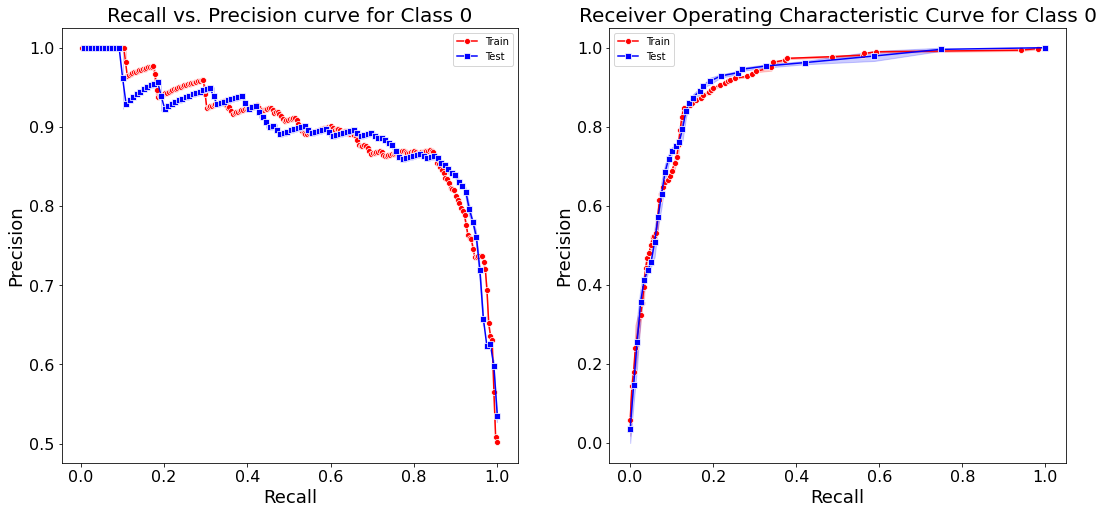

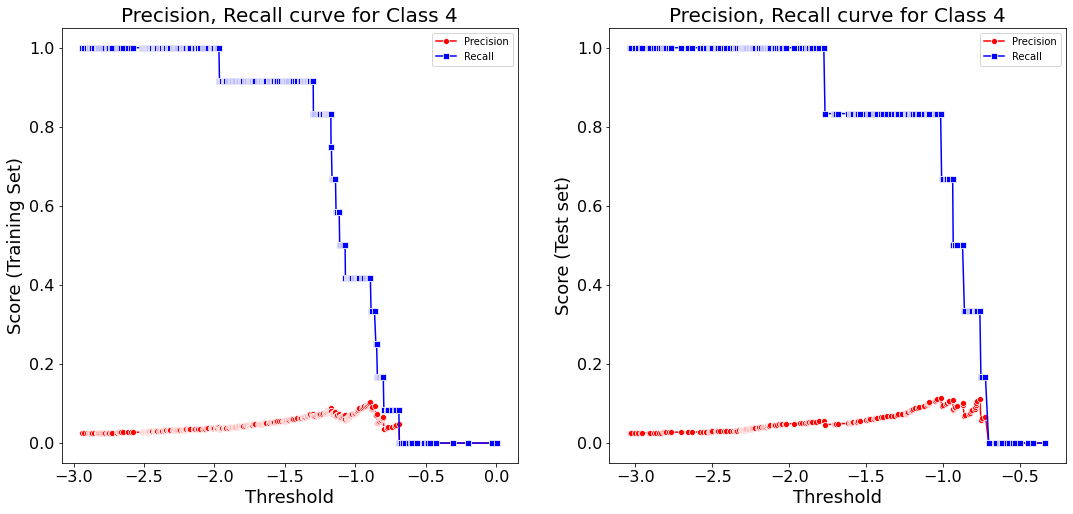

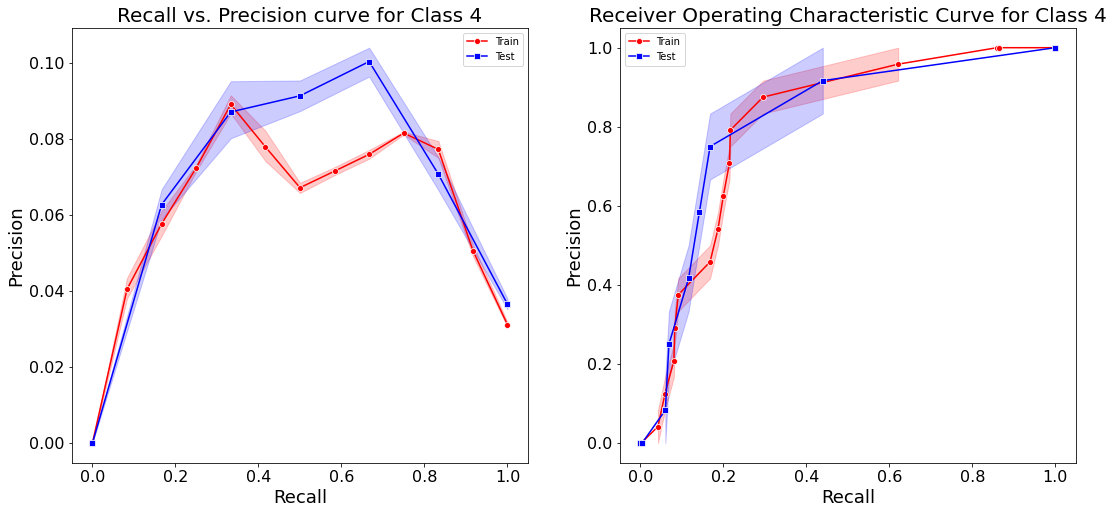

In [12]:
plot_confusion_matrix(clf, X_train, X_test, Y_train, Y_test)
get_precision_recall(clf, X_train, X_test, Y_train, Y_test, 0)
get_precision_recall(clf, X_train, X_test, Y_train, Y_test, 4)

In [13]:
estimators = [('rfc', make_pipeline(StandardScaler(),rfc)),
              ('svc', make_pipeline(StandardScaler(),svc)),
              ('gbc', make_pipeline(StandardScaler(),gbc)),
              ('knn', make_pipeline(StandardScaler(),knn)),
              ('glm', make_pipeline(StandardScaler(),glm))
             ]

In [14]:
clf = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(), stack_method = 'predict_proba')
model_fit2(clf, X_train, X_test, Y_train, Y_test)

StackingClassifier

Train score is :0.753
Test score is :0.626


StackingClassifier
Precision score for training set is :0.85
Precision score for testing  set is :0.76
Recall score for training set is :0.93
Recall score for testing  set is :0.89
F1 score for training set is :0.89
F1 score for testing  set is :0.82
AUC for training set is :0.91
AUC for testing  set is :0.9
Precision score for training set is :1.0
Precision score for testing  set is :0.0
Recall score for training set is :0.25
Recall score for testing  set is :0.0
F1 score for training set is :0.4
F1 score for testing  set is :0.0
AUC for training set is :0.81
AUC for testing  set is :0.84


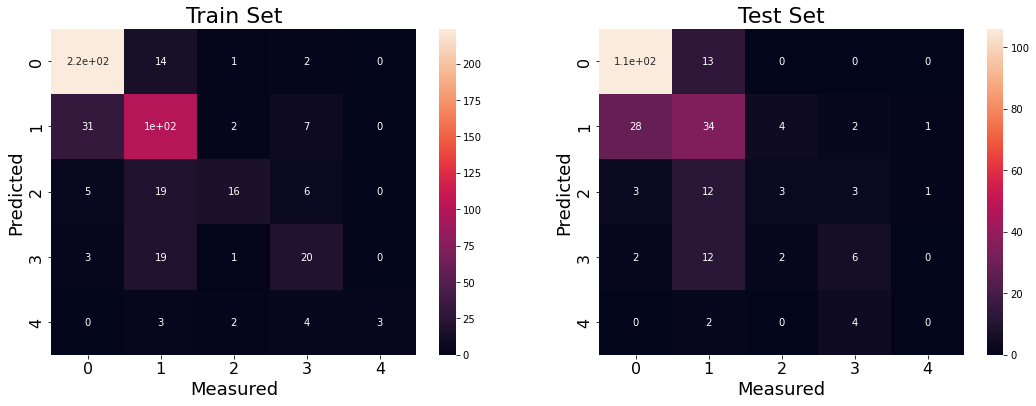

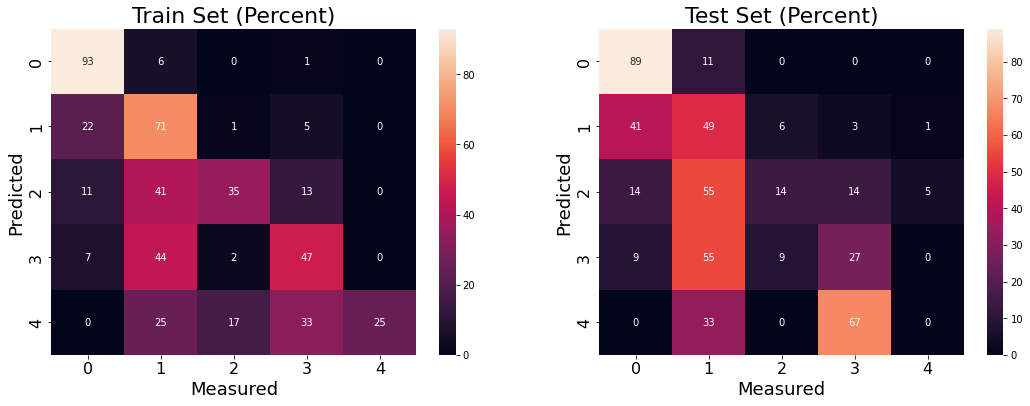

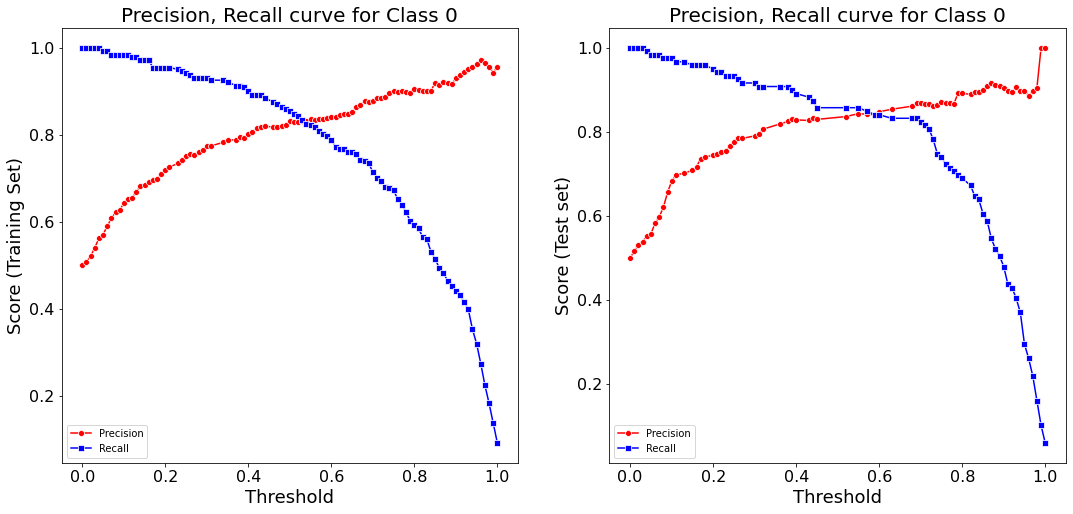

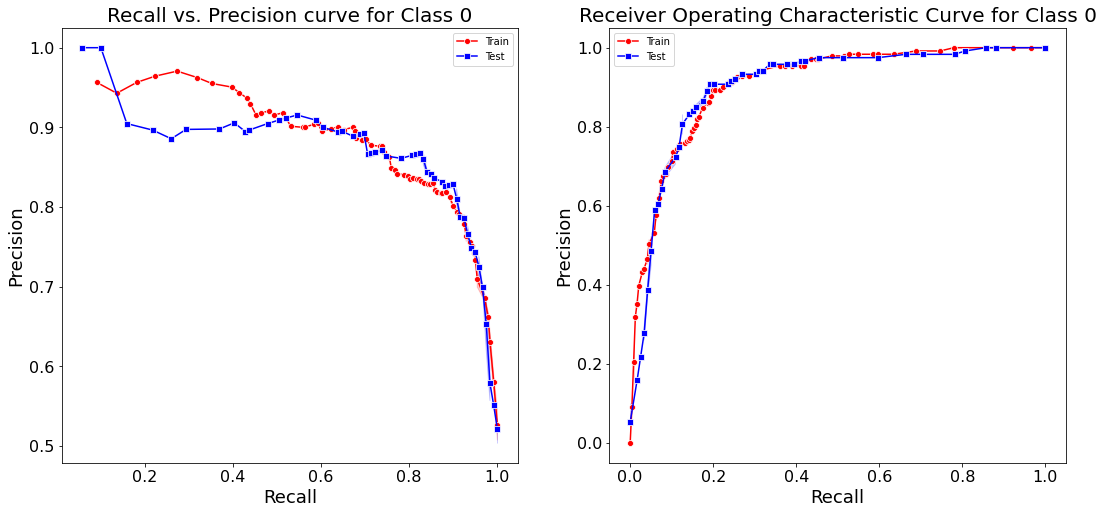

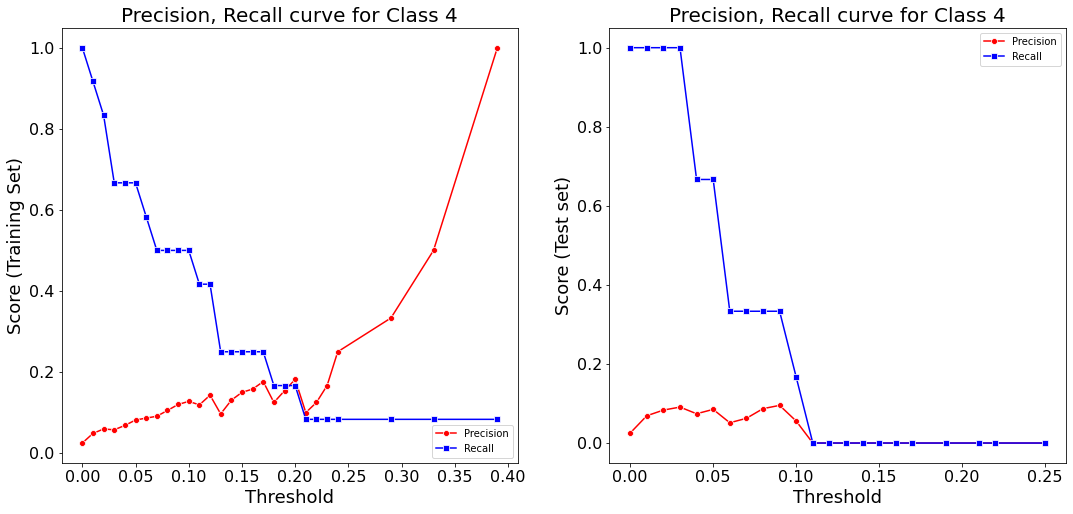

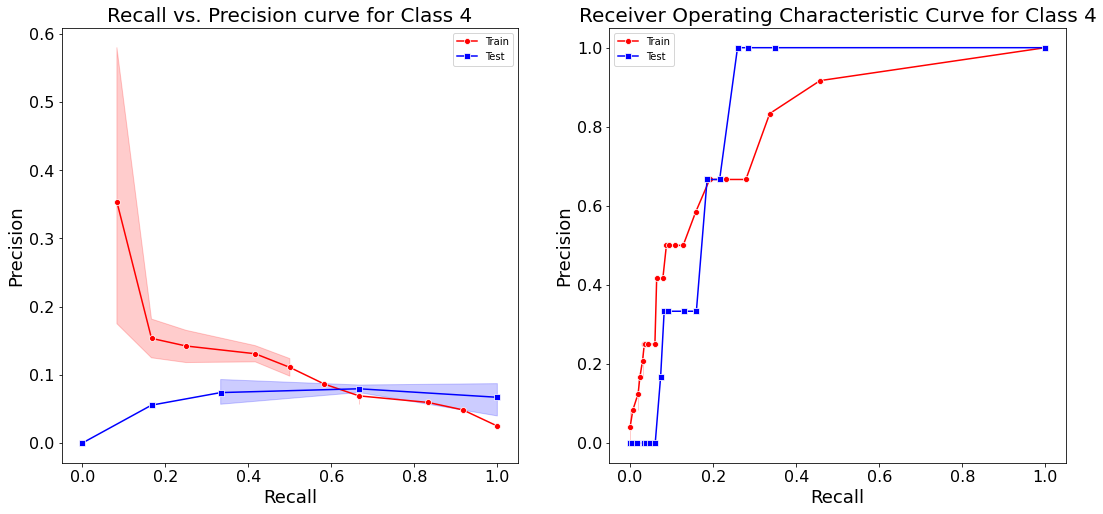

In [15]:
plot_confusion_matrix(clf, X_train, X_test, Y_train, Y_test)
get_precision_recall(clf, X_train, X_test, Y_train, Y_test, 0)
get_precision_recall(clf, X_train, X_test, Y_train, Y_test, 4)

In [16]:
estimators = [('glm', make_pipeline(StandardScaler(),glm)),
              ('rfc', make_pipeline(StandardScaler(),rfc)),
              ('svc', make_pipeline(StandardScaler(),svc)),
              ('gbc', make_pipeline(StandardScaler(),gbc)),
              ('knn', make_pipeline(StandardScaler(),knn)),
              ('GNB', make_pipeline(StandardScaler(),GNB))
             ]

In [17]:
clf = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier())
model_fit2(clf, X_train, X_test, Y_train, Y_test)

StackingClassifier

Train score is :0.761
Test score is :0.63


StackingClassifier
Precision score for training set is :0.85
Precision score for testing  set is :0.78
Recall score for training set is :0.95
Recall score for testing  set is :0.9
F1 score for training set is :0.9
F1 score for testing  set is :0.83
AUC for training set is :0.91
AUC for testing  set is :0.91
Precision score for training set is :0.75
Precision score for testing  set is :0.0
Recall score for training set is :0.25
Recall score for testing  set is :0.0
F1 score for training set is :0.38
F1 score for testing  set is :0.0
AUC for training set is :0.82
AUC for testing  set is :0.85


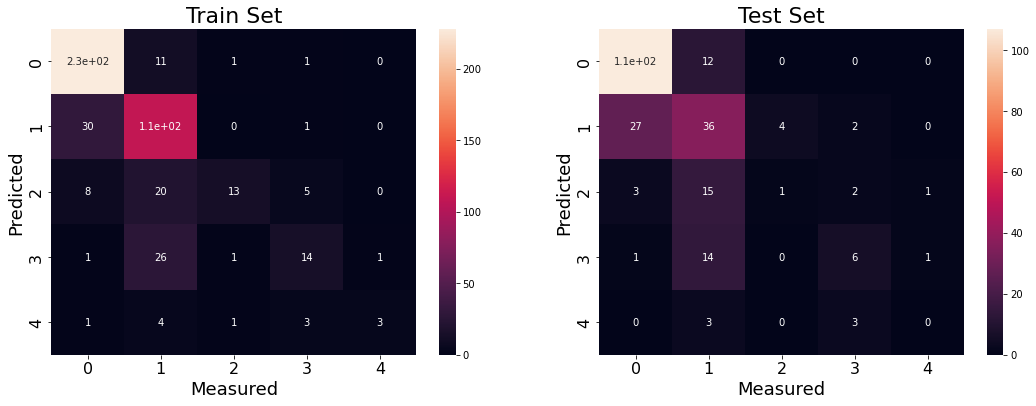

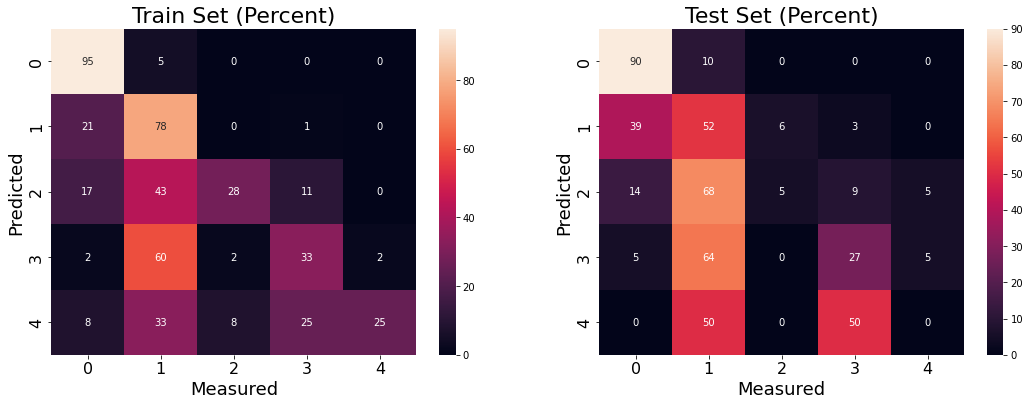

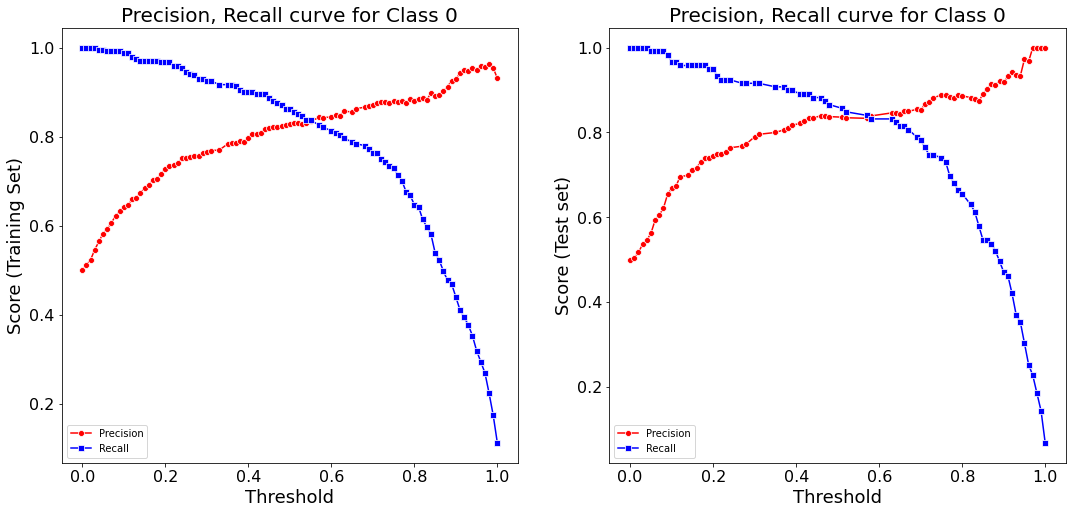

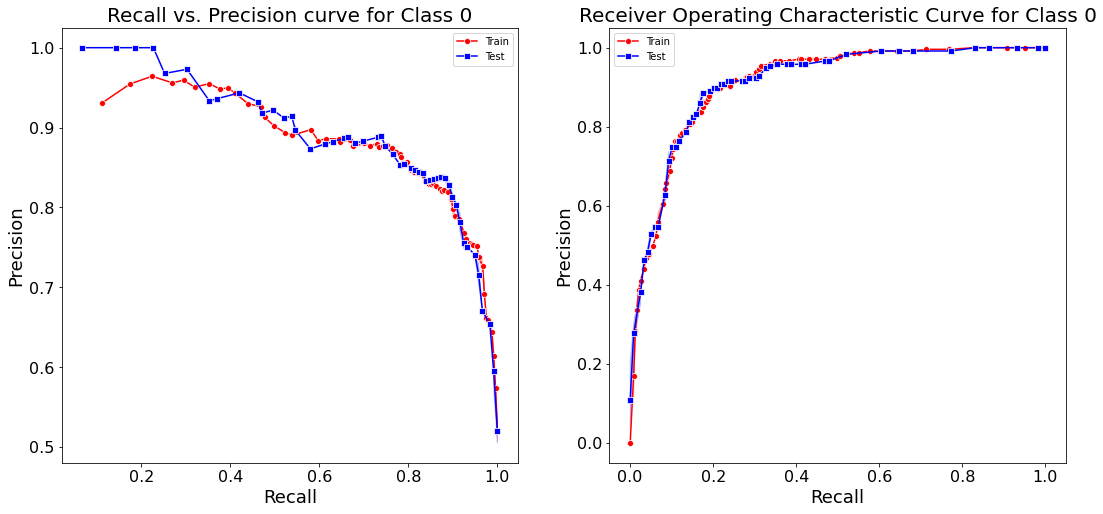

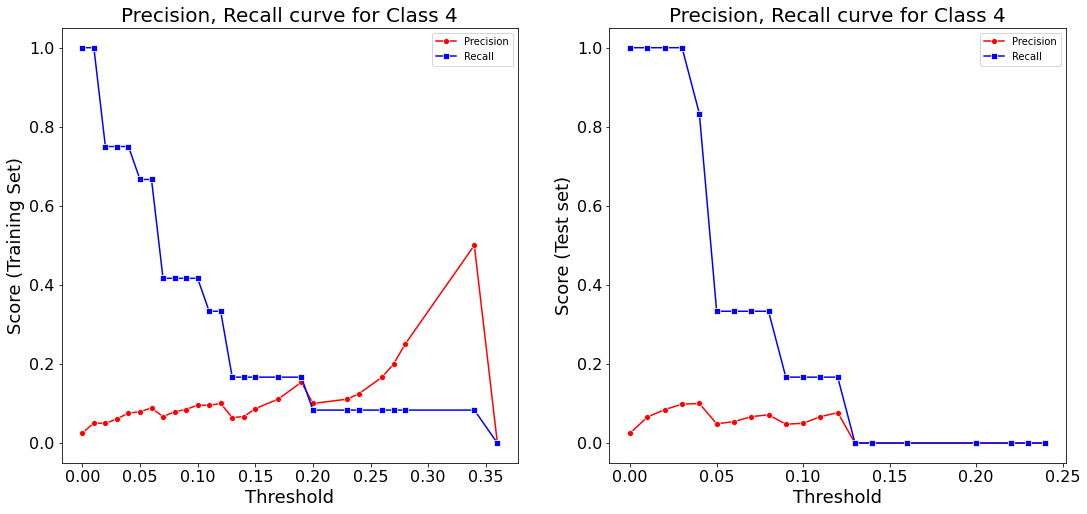

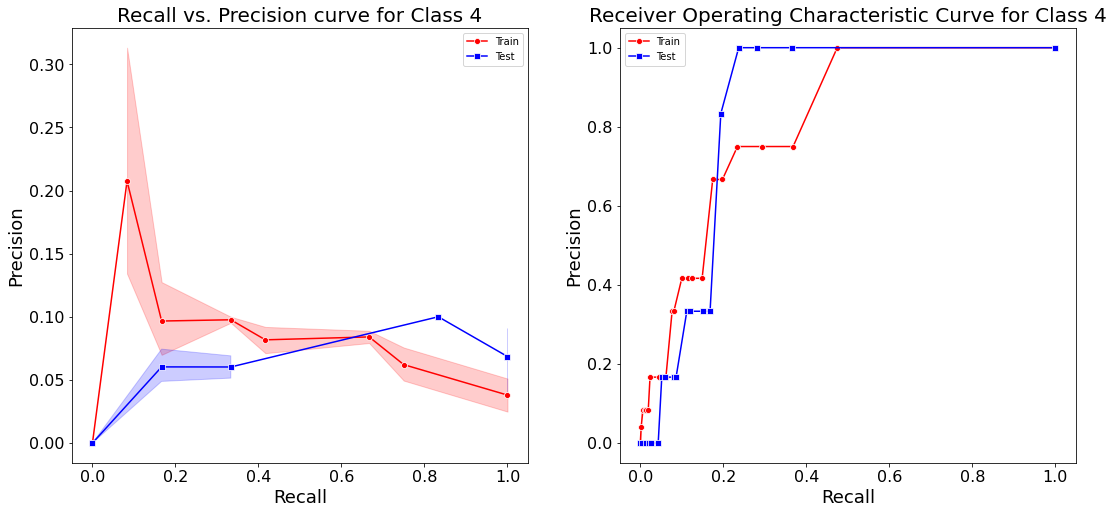

In [18]:
plot_confusion_matrix(clf, X_train, X_test, Y_train, Y_test)
get_precision_recall(clf, X_train, X_test, Y_train, Y_test, 0)
get_precision_recall(clf, X_train, X_test, Y_train, Y_test, 4)

In [19]:
clf = StackingClassifier(estimators=estimators, final_estimator=svm.SVC())
model_fit2(clf, X_train, X_test, Y_train, Y_test)

StackingClassifier

Train score is :0.67
Test score is :0.634


StackingClassifier
Precision score for training set is :0.84
Precision score for testing  set is :0.81
Recall score for training set is :0.89
Recall score for testing  set is :0.87
F1 score for training set is :0.86
F1 score for testing  set is :0.84
AUC for training set is :0.89
AUC for testing  set is :0.88
Precision score for training set is :0.0
Precision score for testing  set is :0.0
Recall score for training set is :0.0
Recall score for testing  set is :0.0
F1 score for training set is :0.0
F1 score for testing  set is :0.0
AUC for training set is :0.73
AUC for testing  set is :0.68


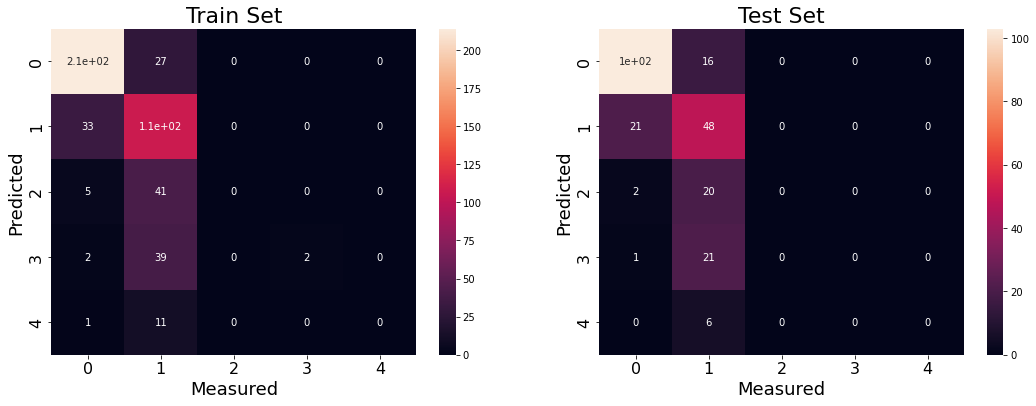

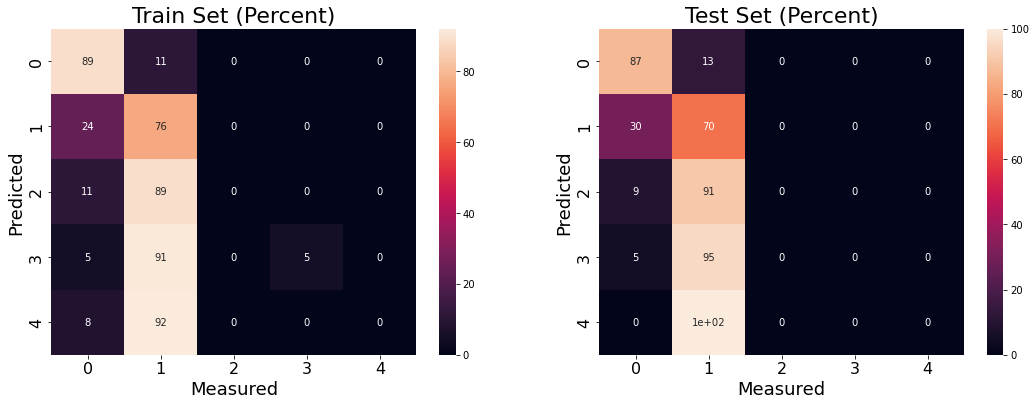

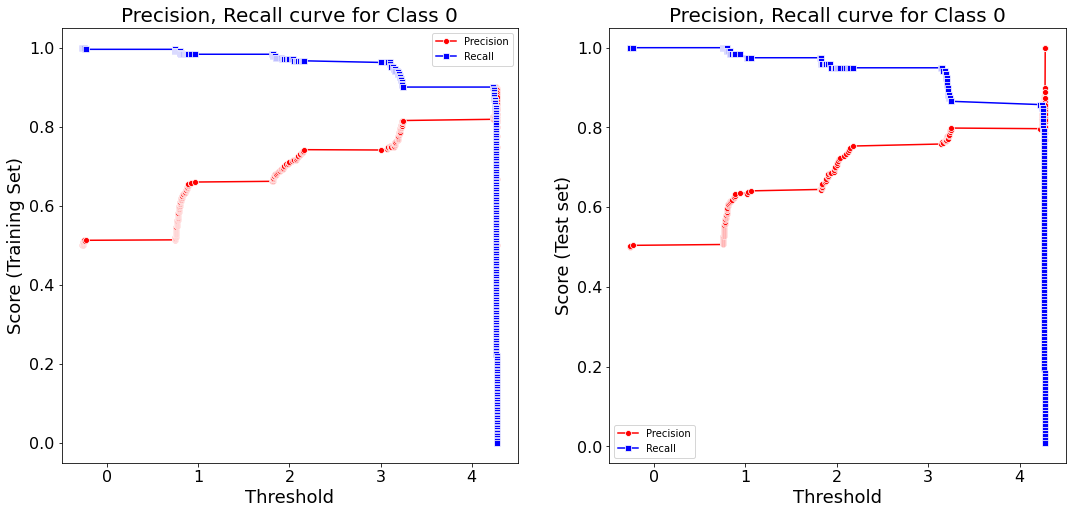

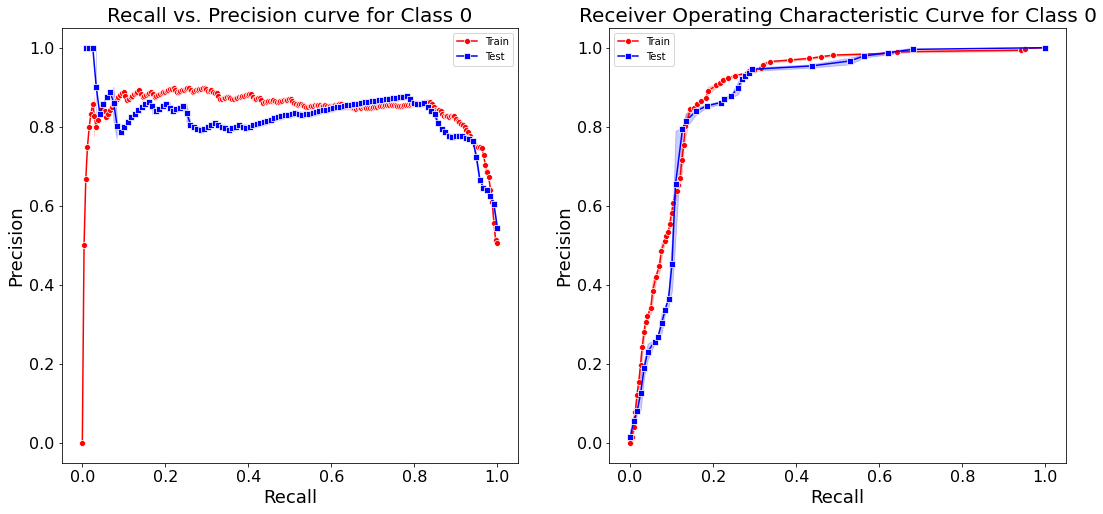

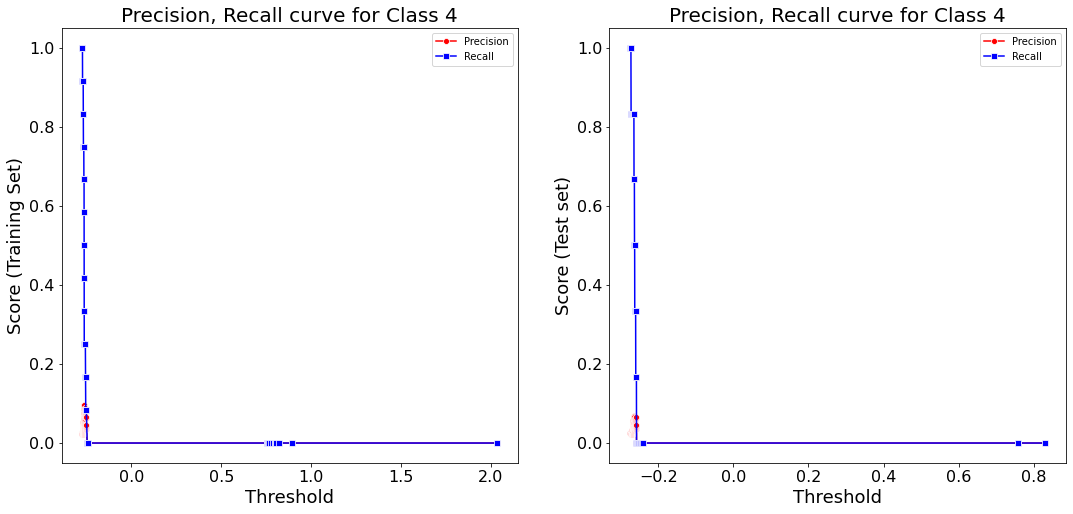

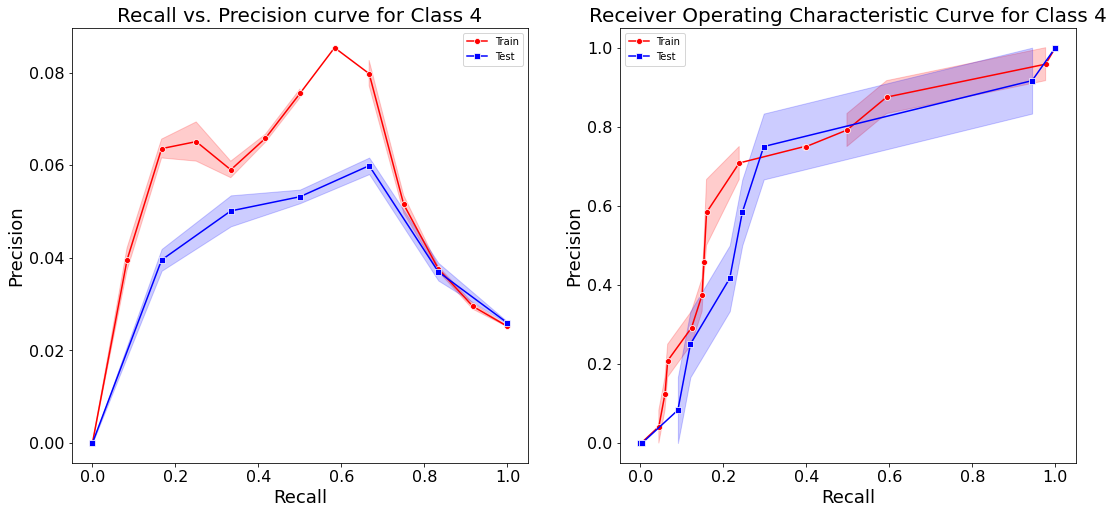

In [20]:
plot_confusion_matrix(clf, X_train, X_test, Y_train, Y_test)
get_precision_recall(clf, X_train, X_test, Y_train, Y_test, 0)
get_precision_recall(clf, X_train, X_test, Y_train, Y_test, 4)

In [21]:
clf.estimators_

[Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=100000.0))]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(max_depth=3, max_features=8,
                                         min_samples_split=10,
                                         min_weight_fraction_leaf=0.01,
                                         random_state=144))]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=0.05, degree=1, gamma=0.05, kernel='poly',
                      max_iter=100000.0, probability=True, random_state=144))]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier',
                  GradientBoostingClassifier(ccp_alpha=0.01, max_depth=5,
                                             max_features=5,
                              

In [22]:
clf.n_features_in_

13

In [23]:
clf.feature_names_in_

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)